<h1><center> Act Report </center></h1>

<p> This report summarizes insights produced from analyzing the WeRateDogs Twitter Data. The cleaned data has a total of 1873 observations and 15 variables. Some missing values are present in the data to avoid losing information from the large number of observations of certain variables if all the missing values are removed. Therefore, the data is queried as per the variables required for answering each question. </p>

<p> In the next section, a summary of the data analysis with visualizations are presented. Through the analysis below we try to understand and gain more insight into the dataset by answering 11 questions. The questions are
<ol>
    <li> What is the average dog rating?
    <li> What is the average prediction model confidence in the first prediction?
    <li> How the prediction model confidence in the first prediction is distributed?
    <li> What is the average model accuracy in predicitng a dog in the first prediction?
    <li> What is the relationship between dog rating and retweet count ?
    <li> Is there a relationship between dog rating and favorite count ?
    <li> Does a certain dog_stage recieve better rating than the other stages ?
    <li> What are the six most popular dog names ?
    <li> What are the top three dog breeds predicted by the model?
    <li> Are the dog ratings related to dog stage?
    <li> Does the dog breed affect its rating? What are the 25 most highly rated dog breeds ?
</ol>        
</p>

<p> In summary, the dog ratings are related to the dog breeds, the dog stages. The higher the dog rating the more likely the tweet will be retweeted and favorited. The puppo dog stage is less common than the other stages. In general, dumber dogs receive better ratings than the other dog breeds. </p>

### Data analysis and visualization

In [6]:
print(f"The data has {df.shape[0]} observations and {df.shape[1]} variables" )

The data has 1873 observations and 15 variables


#### Q1. What is the average dog rating?

In [398]:
print(f"The aversge dog rating is {round(df.rating_numerator.mean(), 2)}/10")

The aversge dog rating is 12.18/10


#### Q2. What is the average prediction model confidence in the first prediction?

In [399]:
print(f"The avereage prediction model confidence in the first prediction is {round(df.p1_conf.mean()*100, 2)}%")

The avereage prediction model confidence in the first prediction is 59.55%


#### Q3.How the prediction model confidence in the first prediction is distributed?

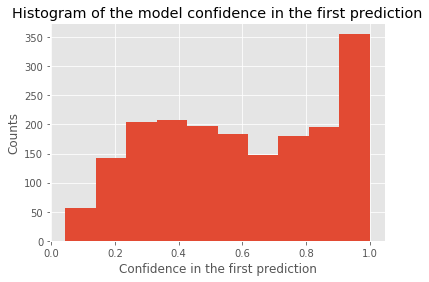

In [400]:
plt.style.use('ggplot')
x = df.p1_conf
plt.hist(x)
plt.title("Histogram of the model confidence in the first prediction")
plt.xlabel("Confidence in the first prediction");
plt.ylabel("Counts");

#### Q4. What is the average model accuracy in predicitng a dog in the first prediction?

In [401]:
print(f"The average model accuracy in predicitng a dog in the first prediction is {round(df.p1_dog.mean()*100, 2)}%")

The average model accuracy in predicitng a dog in the first prediction is 74.37%


#### Q5. Is there a relation between dog rating and retweet count ?

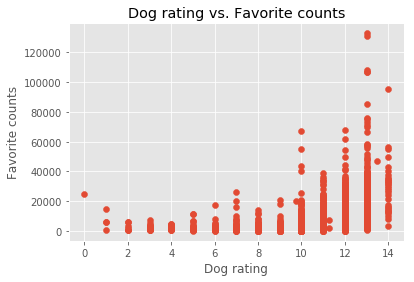

In [402]:
plt.style.use('ggplot')
# Removing outliers
df1 = df[['rating_numerator', 'favorite_count']].query("rating_numerator < 20")
x = df1.rating_numerator
y = df1.favorite_count
plt.scatter(x,y)
plt.title("Dog rating vs. Favorite counts")
plt.xlabel("Dog rating");
plt.ylabel("Favorite counts");

<b>In general, the number of favoritng the tweet increase with the increase in the dog rating. </b>

#### Q6. Is there a relation between dog rating and favorite count ?

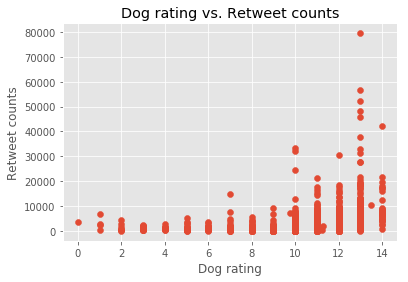

In [403]:
plt.style.use('ggplot')
# Removing outliers
df1 = df[['rating_numerator', 'retweet_count']].query("rating_numerator < 20")
x = df1.rating_numerator
y = df1.retweet_count
plt.scatter(x,y)
plt.title("Dog rating vs. Retweet counts")
plt.xlabel("Dog rating");
plt.ylabel("Retweet counts");

<b>In general, the number of retweets increase with the increase in the dog rating. </b>

#### Q7. Does a certain dog_stage recieve better rating than the other stages ?

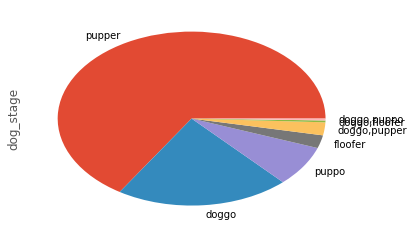

In [404]:
df.dog_stage[df.dog_stage!='nan'].value_counts().plot(kind="pie");

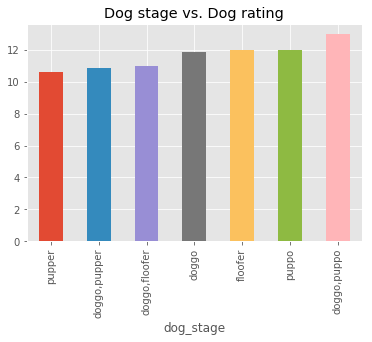

In [405]:
df3 = df[df.dog_stage != 'nan']
df3 = df3.groupby("dog_stage").mean()["rating_numerator"].sort_values().plot(kind='bar', title= "Dog stage vs. Dog rating")

<b>In general, puppo dog stage receive better ratings than the doggo and the pupper stages. Also, the puppo stage is less common compared with the other dog stages. </b>

#### Q8. What are the six most popular dog names ?

In [406]:
print(f"The six most popular dog names are {df.name.value_counts()[:6].index.values}")

The six most popular dog names are ['Charlie' 'Cooper' 'Lucy' 'Oliver' 'Penny' 'Tucker']


#### Q9. What are the top three dog breeds predicted by the model?

In [407]:
print(f"The top top three dog breeds in predicted by the model are {df.p1[df.p1_dog].value_counts()[:3].index.values}")

The top top three dog breeds in predicted by the model are ['golden_retriever' 'Labrador_retriever' 'Pembroke']


#### Q10. Are the dog ratings related to dog stage?

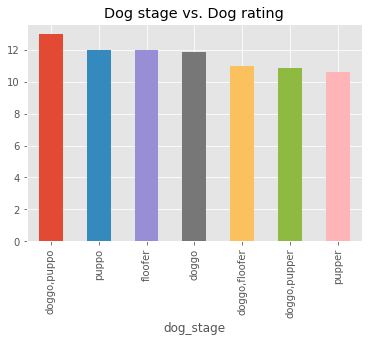

In [408]:
df3 = df[df.dog_stage != 'nan']
df3 = df3.groupby("dog_stage").mean()["rating_numerator"].sort_values(ascending=False).plot(kind='bar', title= "Dog stage vs. Dog rating")

<b>Dog ratings are affected by the dog stage. In general, puppo dog stage receive better ratings than the doggo and the pupper stages </b>

#### Q11. Does the dog breed affect its rating? What are the 25 most highly rated dog breeds ?

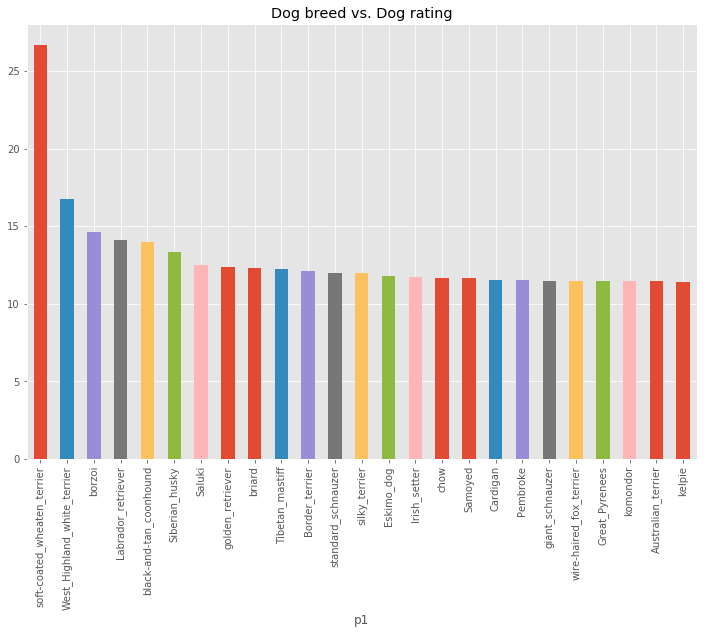

In [409]:
df4 = df[df.p1_dog][["p1","rating_numerator"]]
df4.groupby("p1").mean()["rating_numerator"].sort_values(ascending=False)[:25].plot(kind='bar', title= "Dog breed vs. Dog rating", figsize = (12,8));

<b>Dog ratings are affected by the dog breed. In general, dogs predicted as dumber receive better ratings than the other dog breeds </b>